In [0]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [0]:
data_type={'is_booking':bool,'srch_ci' : np.str_, 'srch_co' : np.str_,
           'srch_adults_cnt' : np.int32, 'srch_children_cnt' : np.int32,
           'srch_rm_cnt' : np.int32, 'srch_destination_id':np.int32,
           'user_location_country' : np.int32, 'user_location_region' : np.int32,
           'user_location_city' : np.int32, 'hotel_cluster' : np.int32,
           'orig_destination_distance':np.float64, 'date_time':np.str_,
           'hotel_market':np.int32}
d_type={'is_booking':bool, 'cnt':np.int32, 'hotel_cluster' : np.int32,'srch_destination_id':np.int32}

In [0]:
df1 = pd.read_csv('/Hotel recomendation dataset/train.csv', sep=',').dropna()
dest = pd.read_csv('/Hotel recomendation dataset/destinations.csv')
df = df1.sample(frac=0.008, random_state=50)
df.shape

(192943, 24)

(192943, 24)

In [0]:
df.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
6905684,2014-11-24 10:21:01,2,3,66,184,27733,87.9601,1141234,0,0,2,2014-11-27,2014-11-28,2,1,1,8843,1,0,1,2,50,671,73
20977949,2014-12-10 18:44:28,2,3,66,442,35390,1224.5462,735752,0,0,2,2015-01-10,2015-01-13,2,0,1,12206,6,0,1,2,50,628,79
35314912,2013-11-14 12:22:13,2,3,66,220,43026,128.2297,855227,0,0,3,2013-12-21,2013-12-22,2,0,1,26051,6,1,1,2,50,1235,90
14458576,2013-02-07 14:19:30,2,3,66,351,6042,1560.3346,1103119,0,0,9,2013-03-26,2013-03-27,2,0,2,23683,6,0,1,2,50,659,59
19951151,2014-03-29 18:15:39,2,3,66,288,21662,1392.1225,58272,1,1,9,2014-05-08,2014-05-13,2,0,1,8810,1,0,2,4,8,1532,65


In [0]:
df['hotel_cluster']

6905684     73
20977949    79
35314912    90
14458576    59
19951151    65
            ..
2763714     96
9059389     68
26771253    63
34513287    82
19350330    90
Name: hotel_cluster, Length: 192943, dtype: int64

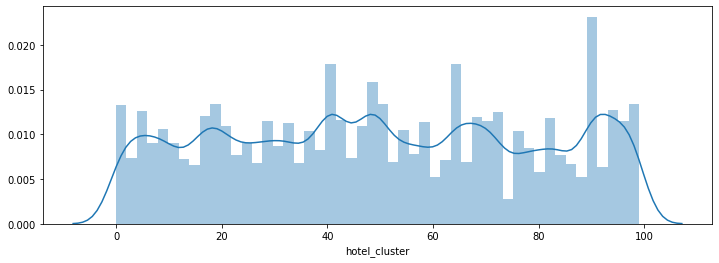

In [0]:
plt.figure(figsize=(12, 4))
sns.distplot(df['hotel_cluster'])

In [0]:
from datetime import datetime
def get_year(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass

def get_month(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass
    
def left_merge_dataset(left_dframe, right_dframe, merge_column):
    return pd.merge(left_dframe, right_dframe, on=merge_column, how='left')

In [0]:
# msk = np.random.rand(len(df)) < 0.8
# train = df[msk]
# test = df[~msk];;;;;;;

In [0]:
# dealing with date_time column

df['date_time_year'] = pd.Series(df.date_time, index = df.index)
df['date_time_month'] = pd.Series(df.date_time, index = df.index)

from datetime import datetime
df.date_time_year = df.date_time_year.apply(lambda x: get_year(x))
df.date_time_month = df.date_time_month.apply(lambda x: get_month(x))

del df['date_time']

In [0]:
# work on srch_ci column

df['srch_ci_year'] = pd.Series(df.srch_ci, index=df.index)
df['srch_ci_month'] = pd.Series(df.srch_ci, index=df.index)

# convert year & months to int
df.srch_ci_year = df.srch_ci_year.apply(lambda x: get_year(x))
df.srch_ci_month = df.srch_ci_month.apply(lambda x: get_month(x))

# remove the srch_ci column
del df['srch_ci']

In [0]:
# work on srch_co column

df['srch_co_year'] = pd.Series(df.srch_co, index=df.index)
df['srch_co_month'] = pd.Series(df.srch_co, index=df.index)

# convert year & months to int
df.srch_co_year = df.srch_co_year.apply(lambda x: get_year(x))
df.srch_co_month = df.srch_co_month.apply(lambda x: get_month(x))

# remove the srch_co column
del df['srch_co']

In [0]:
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
6905684,2,3,66,184,27733,87.9601,1141234,0,0,2,2,1,1,8843,1,0,1,2,50,671,73,2014,11,2014,11,2014,11
20977949,2,3,66,442,35390,1224.5462,735752,0,0,2,2,0,1,12206,6,0,1,2,50,628,79,2014,12,2015,1,2015,1
35314912,2,3,66,220,43026,128.2297,855227,0,0,3,2,0,1,26051,6,1,1,2,50,1235,90,2013,11,2013,12,2013,12
14458576,2,3,66,351,6042,1560.3346,1103119,0,0,9,2,0,2,23683,6,0,1,2,50,659,59,2013,2,2013,3,2013,3
19951151,2,3,66,288,21662,1392.1225,58272,1,1,9,2,0,1,8810,1,0,2,4,8,1532,65,2014,3,2014,5,2014,5


In [0]:
df.corr()["hotel_cluster"].sort_values()

srch_destination_type_id    -0.036429
site_name                   -0.026223
hotel_country               -0.024249
is_booking                  -0.022589
user_location_country       -0.019783
srch_destination_id         -0.016696
user_location_city          -0.006461
srch_rm_cnt                 -0.006457
channel                     -0.003739
date_time_year              -0.001979
date_time_month              0.000018
srch_co_month                0.001154
srch_ci_month                0.001213
user_id                      0.001935
hotel_continent              0.002511
is_mobile                    0.003118
cnt                          0.004755
srch_ci_year                 0.006481
srch_co_year                 0.006776
posa_continent               0.008370
user_location_region         0.009522
srch_adults_cnt              0.010291
srch_children_cnt            0.010705
orig_destination_distance    0.012349
hotel_market                 0.024665
is_package                   0.050486
hotel_cluste

In [0]:
df.shape

(192943, 27)

In [0]:
pieces = [df.groupby(['srch_destination_id','hotel_country','hotel_market','hotel_cluster'])['is_booking'].agg(['sum','count'])]
agg = pd.concat(pieces).groupby(level=[0,1,2,3]).sum()
agg.dropna(inplace=True)

In [0]:
agg.head()

sum  count
srch_destination_id hotel_country hotel_market hotel_cluster            
4                   7             246          22               0      1
                                               30               0      1
                                               40               0      1
                                               43               0      1
                                               62               0      1

In [0]:
agg['sum_and_cnt'] = 0.85*agg['sum'] + 0.15*agg['count']
agg = agg.groupby(level=[0,1,2]).apply(lambda x: x.astype(float)/x.sum())
agg.reset_index(inplace=True)

In [0]:
agg.head()

,srch_destination_id,hotel_country,hotel_market,hotel_cluster,sum,count,sum_and_cnt
0,4,7,246,22,NaN,0.125,0.125
1,4,7,246,30,NaN,0.125,0.125
2,4,7,246,40,NaN,0.125,0.125
3,4,7,246,43,NaN,0.125,0.125
4,4,7,246,62,NaN,0.125,0.125


In [0]:
agg_pivot = agg.pivot_table(index=['srch_destination_id','hotel_country','hotel_market'], columns='hotel_cluster', values='sum_and_cnt').reset_index()

In [0]:
agg_pivot.head()

hotel_cluster,srch_destination_id,hotel_country,hotel_market,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,4,7,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.125,NaN,NaN,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,50,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016949,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033898,NaN,NaN,0.016949,NaN,NaN,NaN,NaN,NaN
2,10,50,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,50,824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,27,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = pd.merge(df, dest, how='left', on='srch_destination_id')
df = pd.merge(df, agg_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market'])

In [0]:
df.fillna(0, inplace=True)

In [0]:
df.shape

(192943, 276)

In [0]:
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2,3,66,184,27733,87.9601,1141234,0,0,2,2,1,1,8843,1,0,1,2,50,671,73,2014,11,2014,11,2014,11,-2.186157,-2.232364,-2.232364,-2.178468,-2.189438,-1.990528,-2.232364,-2.228158,-2.231582,-2.217870,-2.044189,-2.232364,-2.190958,...,0.000000,0.000000,0.000000,0.025042,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.025042,0.015025,0.095159,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.105175,0.000000,0.005008,0.000000,0.000000,0.015025,0.055092,0.000000,0.165275,0.000000,0.000000,0.000000,0.068447,0.025042,0.0,0.0
1,2,3,66,442,35390,1224.5462,735752,0,0,2,2,0,1,12206,6,0,1,2,50,628,79,2014,12,2015,1,2015,1,-2.228747,-2.262795,-2.360155,-2.329214,-2.237640,-1.793412,-2.357969,-2.352442,-2.225186,-2.265767,-2.321278,-2.360155,-2.348140,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.008868,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.176658,0.0,0.0,0.0,0.000355,0.014426,0.000000,0.000000,0.000000,0.012061,0.000000,0.000000,0.000000,0.000000,0.000000,0.002128,0.000000,0.000000,0.000000,0.0,0.0
2,2,3,66,220,43026,128.2297,855227,0,0,3,2,0,1,26051,6,1,1,2,50,1235,90,2013,11,2013,12,2013,12,-2.283161,-2.297107,-2.297107,-2.250037,-1.983427,-1.933392,-2.297107,-2.212360,-2.147443,-2.216821,-2.220185,-2.297107,-2.158968,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.070664,0.0,0.0,0.000000,0.051392,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.006424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113490,0.081370,0.000000,0.044968,0.000000,0.049251,0.000000,0.000000,0.0,0.0
3,2,3,66,351,6042,1560.3346,1103119,0,0,9,2,0,2,23683,6,0,1,2,50,659,59,2013,2,2013,3,2013,3,-2.169442,-2.247781,-2.215181,-2.240045,-2.065385,-1.924369,-2.226967,-2.247781,-2.247781,-2.191875,-2.133133,-2.247781,-2.244854,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160221,0.000000,0.000000,0.016575,0.000000,0.000000,0.000000,0.0,0.0
4,2,3,66,288,21662,1392.1225,58272,1,1,9,2,0,1,8810,1,0,2,4,8,1532,65,2014,3,2014,5,2014,5,-2.044807,-2.316745,-2.274496,-2.311293,-2.060818,-1.825605,-2.316790,-2.314938,-1.474501,-2.224047,-2.253916,-2.316790,-2.005638,...,0.000777,0.031874,0.003887,0.053900,0.020212,0.190205,0.075149,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.013993,0.0,0.0,0.002332,0.0,0.001555,0.000000,0.0,0.0,0.0,0.001555,0.023063,0.010106,0.004664,0.062711,0.000000,0.000000,0.006997,0.000000,0.009329,0.001555,0.000000,0.000777,0.039907,0.000000,0.0,0.0


In [0]:
df = df.loc[df['is_booking'] == 1]

In [0]:
X = df.drop(['user_id', 'hotel_cluster', 'is_booking'], axis=1)
y = df.hotel_cluster

In [0]:
X.shape, y.shape

((15953, 273), (15953,))

In [0]:
y.nunique()

100

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [0]:
X_train.shape, y_train.shape

((12762, 273), (12762,))

In [0]:
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)

In [0]:
scale = StandardScaler().fit(X_test)
X_test_scaled = scale.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
from sklearn import metrics
y_pred = knn.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

Accuracy: 41.44334743770569


In [0]:
from sklearn import metrics
y_pred = knn.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 28.141648386085865


In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 28.141648386085865


In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn import metrics
y_pred = lr.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

Accuracy: 43.91944836232565


In [0]:
y_pred = lr.predict(X_test_scaled)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 30.742713882795364


In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=0.5)
svclassifier.fit(X_train_scaled, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn import metrics
y_pred = svclassifier.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

Accuracy: 39.46089954552578


In [0]:
from sklearn import metrics
y_pred = svclassifier.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 33.563146349106866


In [0]:
from sklearn.ensemble import RandomForestClassifier
rndclf=RandomForestClassifier(n_estimators=500)
rndclf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn import metrics
y_pred = rndclf.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

Accuracy: 100.0


In [0]:
from sklearn import metrics
y_pred = rndclf.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 28.799749294891885


In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=0.5)
svclassifier.fit(X_train_scaled, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn import metrics
y_pred = svclassifier.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

Accuracy: 61.134618398370165


In [0]:
from sklearn import metrics
y_pred = svclassifier.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 30.084612973989344


In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=0.5)
svclassifier.fit(X_train_scaled, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn import metrics
y_pred = svclassifier.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

Accuracy: 61.134618398370165


In [0]:
from sklearn import metrics
y_pred = svclassifier.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 30.084612973989344


In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',C=0.5,degree=7)
svclassifier.fit(X_train_scaled, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=7, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn import metrics
y_pred = svclassifier.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred)*100)

Accuracy: 18.40620592383639


In [0]:
from sklearn import metrics
y_pred = svclassifier.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 12.754622375430898
